# Bio Assay

### Processing Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load bio essay data into np arrays
data_1a = np.loadtxt('raw_data/data_1a.txt')
data_1b = np.loadtxt('raw_data/data_1b.txt')
data_1c = np.loadtxt('raw_data/data_1c.txt')

In [3]:
# calculate averages and standard deviation

df1 = pd.DataFrame({
    'healthy':    data_1a,
    'treated':    data_1b,
    'untreated':  data_1c,
})

means = pd.DataFrame({ 
    'means': df1.mean(),
    'err':   df1.std(),
})[['means', 'err']]

means.to_csv('processed_data/means.csv')
print('Generated processed_data/means.csv')

Generated processed_data/means.csv


### Create Figure 1

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Agg') # Don't use QT backend
import matplotlib.pyplot as plt

mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['grid.linestyle'] = ':'
%matplotlib inline

In [5]:
# # load data
# data_1a = np.loadtxt( sys.argv[1])
# data_1b = np.loadtxt( sys.argv[2])
# data_1c = np.loadtxt( sys.argv[3])
# means   = pd.read_csv(sys.argv[4])

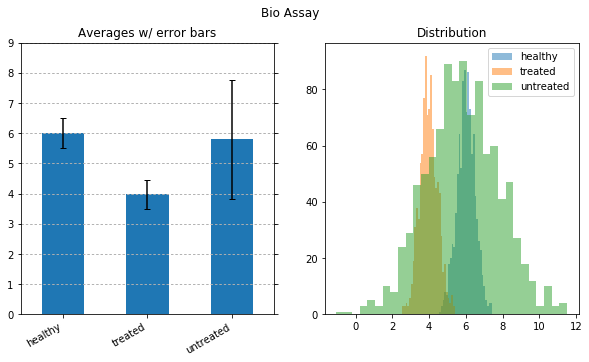

In [6]:
fig1 = plt.figure(1, (10, 5))
fig1.suptitle("Bio Assay")

ax1 = plt.subplot(121)
means['means'].plot(kind='bar', yerr=means['err'], title='Averages w/ error bars')

ax1.yaxis.set_ticks(np.arange(1,10,1), minor=True)
ax1.yaxis.set_ticks_position(position='both')
ax1.yaxis.grid(which='both' )

for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

ax2 = plt.subplot(122)
ax2.set_title('Distribution')
ax2.hist(data_1a, bins=30, alpha=0.5, label='healthy' )
ax2.hist(data_1b, bins=30, alpha=0.5, label='treated' )
ax2.hist(data_1c, bins=30, alpha=0.5, label='untreated' )
ax2.legend()

fig1.savefig("plots/figure_1.svg")

# Calibration Data
### Make Figures 2

In [7]:
import re
import sys
import os.path

import numpy as np
import matplotlib as mpl
#mpl.use('Agg') # Don't use QT backend
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

a:   0.98871235, b:   2.05521619
a:  -1.03686890, b:  12.24411047
a:   0.20877145, b:   4.91106195


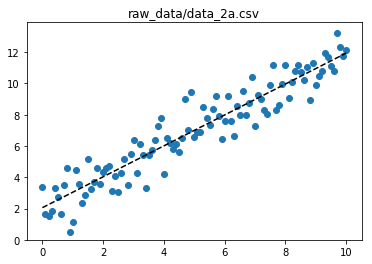

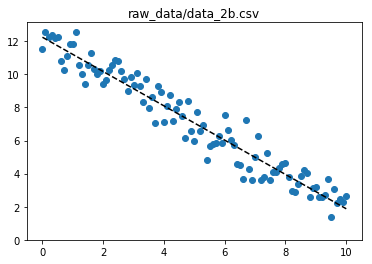

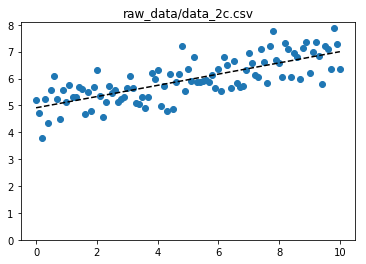

In [8]:
def func(x, a, b):
    '''function ax+b for fitting'''
    return a * x + b

file_names = [
    'raw_data/data_2a.csv',
    'raw_data/data_2b.csv',
    'raw_data/data_2c.csv'
]

for file_name in file_names:
    data_2 = np.loadtxt(file_name, delimiter=',')
    data_2 = data_2.transpose()
    
    x     = data_2[0]
    y_raw = data_2[1]
    
    # fitting raw data to function
    popt, pconv  = curve_fit(func, x, y_raw)
    a, b = popt[0], popt[1]
    
    print("a: {:12.8f}, b: {:12.8f}".format(a, b))
    
    y_fit = func(x, a, b )

    plt.figure(figsize=(6, 4))
    plt.title(file_name)
    plt.scatter(x, y_raw)
    plt.plot(x, y_fit, 'k--')
    plt.ylim(ymin=0 )    
#     plt.ylim(0, 14)

    figname = re.sub(r'raw_data/data_(.+)\.csv', r'plots/figure_\1.svg', file_name)
    plt.savefig(figname)
 